In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import protfasta 
%autoreload 2
%aimport AD_predictor_tools
%aimport AD_comparison_tools
%aimport PlottingTools

[["Gene ", "AD name", "Start", "End", "uniprotID", "Reference"]]

In [3]:
GSL = pd.read_csv("../data/GSL.csv")[["GeneName", "Start", "End", "uniprotID", "Reference"]]
GSL["Reference"] = GSL["Reference"] + ", GSL"
GSL

,GeneName,Start,End,uniprotID,Reference
0,OTX2,231,289,P32243,"uniprot, GSL"
1,CRX,200,284,O43186,"Chen 2002 pg 873, GSL"
2,VP16,411,490,P06492,"nan / nan / nan / nan, GSL"
3,Oct-4,1,137,Q01860,"Brehm, GSL"
4,Oct-4,290,360,Q01860,"Boija 2018, GSL"
...,...,...,...,...,...
162,AKAP8L,1,268,Q9ULX6,"activation_regions.txt, GSL"
163,ESRRB,203,433,O95718,"transcriptionalactivity_regions.txt, GSL"
164,AHR,118,126,P35869,"transcriptionalactivity_regions.txt, GSL"
165,AHR,266,268,P35869,"transcriptionalactivity_regions.txt, GSL"


In [4]:
Soto = pd.read_csv("../data/SotoEtAl_ADs.csv")
Soto["Reference"] = "PMID: " + Soto["Reference (PMID)"] + ", Soto"
Soto = Soto[["GeneName", "Start", "End", "uniprotID", "Reference"]]
Soto

,GeneName,Start,End,uniprotID,Reference
0,AHCTF1,1445,1698,Q8WYP5,"PMID: 11952839, Soto"
1,AHR,545,848,P35869,"PMID: 8794892, Soto"
2,AIRE,292,545,O43918,"PMID: 11274163, Soto"
3,AKAP8L,1,384,Q9ULX6,"PMID: 11402034, Soto"
4,ALX1,237,281,Q15699,"PMID: 12390248, Soto"
...,...,...,...,...,...
515,ZNF326,1,124,Q5BKZ1,"PMID: 30401956, Soto"
516,ZNF426,99,213,Q9BUY5,"PMID: 17409159, Soto"
517,ZNF641,171,262,Q96N77,"PMID: 16343441, Soto"
518,ZXDA,572,698,P98168,"PMID: 17493635, Soto"


In [5]:
Stanford = pd.read_excel("../data/Stanford_Supplementary Table 2 Domains from Tiles.xlsx")
Stanford = Stanford.rename(columns = {"UniProt ID" : "uniprotID", "HGNC symbol" : "GeneName"})
Stanford["Reference"] = "Stanford"
Stanford = Stanford[["GeneName", "Start", "End", "uniprotID", "Reference"]]

# Stanford did zero-indexing, so adjusting to make one-indexed like other lists
# [Start, End] -> [Start, End)
Stanford["Start"] = Stanford["Start"] + 1
Stanford["End"] = Stanford["End"] + 1
Stanford

,GeneName,Start,End,uniprotID,Reference
0,ABRAXAS1,122,201,Q6UWZ7,Stanford
1,AHR,532,641,P35869,Stanford
2,AHR,642,721,P35869,Stanford
3,AKAP8,2,81,O43823,Stanford
4,AKAP8L,2,81,Q9ULX6,Stanford
...,...,...,...,...,...
369,ZNF532,2,81,Q9HCE3,Stanford
370,ZNF592,2,81,Q92610,Stanford
371,ZNF644,902,981,Q9H582,Stanford
372,ZNF687,2,81,Q8N1G0,Stanford


In [6]:
activity_data = pd.read_csv('../data/Staller2021/SupplementalDataSet4_ActivityData_PredictedADs_renorm20210708_uniprotIDs_added.csv', index_col = 0)
activity_data = activity_data[activity_data["RegionType"] == "Prediction"]
active = activity_data[activity_data["Activity_mean"] > 221]
active["Reference"] = "Staller Activity Data"
active = active[["GeneName", "Start", "End", "uniprotID", "Reference"]]
active["GeneName"] = active["GeneName"].str.extract(r'\|.*\|(.*)_')


# Zero-indexing, so adjusting to make one-indexed like other lists
# [Start, End] -> [Start, End)
active["Start"] = active["Start"] + 1
active["End"] = active["End"]
active

,GeneName,Start,End,uniprotID,Reference
0,ZN561,29.0,68.0,Q8N587,Staller Activity Data
5,MGAP,2795.0,2855.0,Q8IWI9,Staller Activity Data
15,FOS,209.0,246.0,P01100,Staller Activity Data
16,ELF3,134.0,173.0,P78545,Staller Activity Data
17,ZN644,852.0,893.0,Q9H582,Staller Activity Data
19,FOXO4,462.0,505.0,P98177,Staller Activity Data
21,ETV4,40.0,90.0,P43268,Staller Activity Data
23,PTF1A,2.0,75.0,Q7RTS3,Staller Activity Data
25,MYC,12.0,50.0,P01106,Staller Activity Data
28,NFKB1,745.0,788.0,P19838,Staller Activity Data


In [7]:
known_ADs = pd.concat([GSL, Soto, Stanford, active])
known_ADs["Start"] = known_ADs["Start"].astype(int)
known_ADs["End"] = known_ADs["End"].astype(int)
known_ADs = known_ADs.reset_index()
known_ADs

,index,GeneName,Start,End,uniprotID,Reference
0,0,OTX2,231,289,P32243,"uniprot, GSL"
1,1,CRX,200,284,O43186,"Chen 2002 pg 873, GSL"
2,2,VP16,411,490,P06492,"nan / nan / nan / nan, GSL"
3,3,Oct-4,1,137,Q01860,"Brehm, GSL"
4,4,Oct-4,290,360,Q01860,"Boija 2018, GSL"
...,...,...,...,...,...,...
1114,143,ETV1,37,83,P50549,Staller Activity Data
1115,145,E2F4,367,407,Q16254,Staller Activity Data
1116,146,NCOA2,786,825,Q15596,Staller Activity Data
1117,147,NCOA2,1059,1097,Q15596,Staller Activity Data


In [8]:
known_ADs[known_ADs["Start"] == 0]

,index,GeneName,Start,End,uniprotID,Reference


103.95263628239499

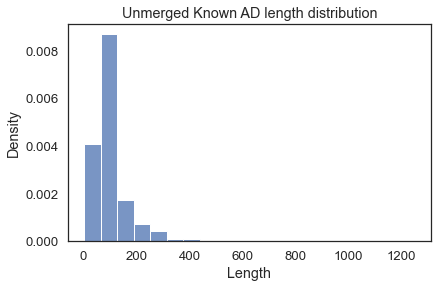

In [9]:
length = known_ADs["End"] - known_ADs["Start"] + 1
plt.xlabel("Length")
plt.title("Unmerged Known AD length distribution")
sns.histplot(length, bins = 20, stat = "density")
np.mean(length)

In [10]:
def return_merged_row(uniprotID, df):
    # Only look at rows with the same uniprot ID
    same_uniprotID_rows = df[df["uniprotID"] == uniprotID]
    same_uniprotID_rows = same_uniprotID_rows.sort_values(by = "Start")
    
    # Final dataframe columns
    new_starts = []
    new_ends = []
    genes = []
    AD_names = []
    references = []
    
    # Current row's values
    curr_start = -1
    curr_end = -1
    curr_genes = []
    curr_AD_names = []
    curr_references = []
    
    for i in same_uniprotID_rows.index:
        # Merge current row with next row
        if curr_end >= same_uniprotID_rows.loc[i]["Start"]:
            curr_end = max(curr_end, same_uniprotID_rows.loc[i]["End"])
            curr_genes.append(same_uniprotID_rows.loc[i]["GeneName"])
            curr_references.append(same_uniprotID_rows.loc[i]["Reference"])
        
        # Don't merge current row with next row
        else: 
            new_starts.append(curr_start)
            new_ends.append(curr_end)
            genes.append(" / ".join(set([c.strip() for c in curr_genes])))
            
            curr_AD_names = [str(c) for c in curr_AD_names]
            AD_names.append(" / ".join(curr_AD_names))
            
            curr_references = [str(c) for c in curr_references]
            references.append(" / ".join(curr_references))
            
            curr_start = same_uniprotID_rows.loc[i]["Start"]
            curr_end = same_uniprotID_rows.loc[i]["End"]
            
            curr_genes = [same_uniprotID_rows.loc[i]["GeneName"]]
            curr_references = [same_uniprotID_rows.loc[i]["Reference"]]
    
    # Append the last values
    new_starts.append(curr_start)
    
    new_ends.append(curr_end)
    
    genes.append(" / ".join(set([c.strip() for c in curr_genes])))
    
    curr_AD_names = [str(c) for c in curr_AD_names]
    AD_names.append(" / ".join(curr_AD_names))
    
    curr_references = [str(c) for c in curr_references]
    references.append(" / ".join(curr_references))
    
    # Remove the first (because it is just -1 or "")
    new_starts = new_starts[1:]
    new_ends = new_ends[1:]
    genes = genes[1:]
    references = references[1:]

    return pd.DataFrame({"Gene": genes,
                         "Start": new_starts,
                        "End": new_ends,
                        "uniprotID": uniprotID,
                         "Reference": references
                        })

In [11]:
dfs = []
i = 0
for uniprotID in known_ADs["uniprotID"].unique():
    dfs.append(return_merged_row(uniprotID, known_ADs))

In [12]:
known_ADs = pd.concat(dfs)
known_ADs = known_ADs.sort_values(by = "uniprotID")
known_ADs.reset_index(inplace= True,drop=True)
known_ADs

,Gene,Start,End,uniprotID,Reference
0,TADA2A,112,211,A0A024R0Y4,Stanford
1,BHLHE23,162,241,A0A087WXG3,Stanford
2,RFX7,862,951,A0A669KBM4,Stanford
3,RFX7,1372,1460,A0A669KBM4,Stanford
4,ARGFX,142,315,A6NJG6,Stanford / Stanford
...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford
737,TAF6L,372,481,Q9Y6J9,Stanford
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford"
739,CAMTA1,702,841,Q9Y6Y1,Stanford


120.8663967611336

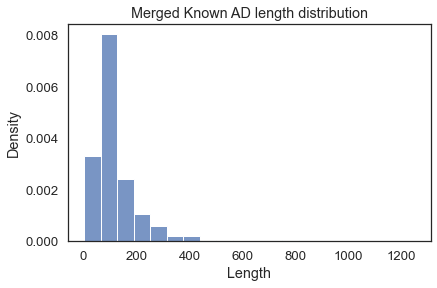

In [13]:
length = known_ADs["End"] - known_ADs["Start"] + 1
plt.xlabel("Length")
plt.title("Merged Known AD length distribution")
sns.histplot(length, bins = 20, stat = "density")
np.mean(length)

In [14]:
known_ADs.to_csv("../data/known_ADs.csv")

In [15]:
known_ADs

,Gene,Start,End,uniprotID,Reference
0,TADA2A,112,211,A0A024R0Y4,Stanford
1,BHLHE23,162,241,A0A087WXG3,Stanford
2,RFX7,862,951,A0A669KBM4,Stanford
3,RFX7,1372,1460,A0A669KBM4,Stanford
4,ARGFX,142,315,A6NJG6,Stanford / Stanford
...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford
737,TAF6L,372,481,Q9Y6J9,Stanford
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford"
739,CAMTA1,702,841,Q9Y6Y1,Stanford


In [16]:
gene_AD_counts = known_ADs.groupby("Gene").size().sort_values(ascending = False)
gene_AD_counts

Gene
FOXJ2         4
NR4A3         4
NR5A2         4
DMTF1         3
TFE3          3
             ..
IRF6          1
IRF5          1
IRF3          1
IRF2          1
c-Jun/AP-1    1
Length: 589, dtype: int64

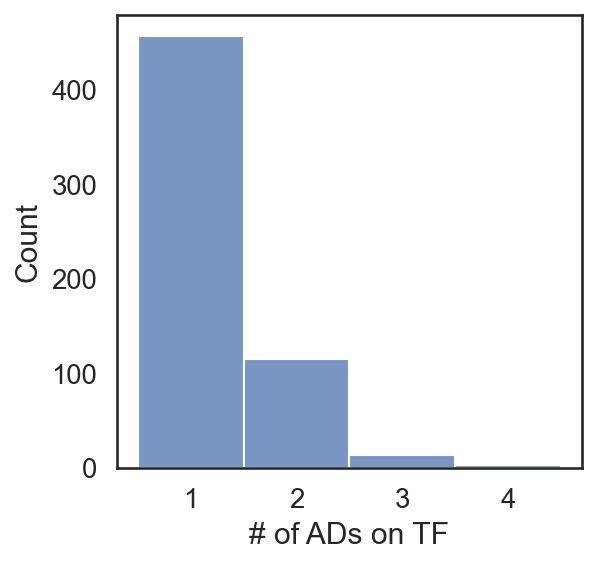

In [17]:
sns.set_style("white");

fig, ax = plt.subplots(figsize=(4, 4), dpi=150);
sns.histplot(gene_AD_counts, discrete = True);
plt.xticks(np.arange(1, max(gene_AD_counts) + 1));
plt.xlabel("# of ADs on TF");
plt.show();

In [18]:
sum(gene_AD_counts >= 3) / len(gene_AD_counts)

0.028862478777589132

In [19]:
# Adding sequences
known_ADs[["uniprotID"]].to_csv("../data/known_AD_uniprotIDs.txt", 
                                                 header=None, index=None, sep=' ', mode='a')

In [20]:
seqs = pd.read_csv("../data/known_AD_seqs.tsv", sep = "\t")
seqs

,From,Entry,Sequence
0,A0A024R0Y4,A0A024R0Y4,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...
1,A0A087WXG3,A0A087WXG3,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...
2,A6NJG6,A6NJG6,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...
3,A8MTJ6,A8MTJ6,MALYCGDNFGVYSQPGLPPPAATAAAPGAPPAARAPYGLADYAAPP...
4,A8MW92,A8MW92,MSKKPPNRPGITFEIGARLEALDYLQKWYPSRIEKIDYEEGKMLVH...
...,...,...,...
570,Q9Y692,Q9Y692,MANAEVSVPVGDVVVVPTEGNEGENPEDTKTQVILQLQPVQQGLFI...
571,Q9Y6F1,Q9Y6F1,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...
572,Q9Y6J9,Q9Y6J9,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...
573,Q9Y6Q9,Q9Y6Q9,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...


In [21]:
# Incorrectly mapped some non canonical isoforms to the canonical sequence!
seqs[seqs["From"].str.contains("-")]

,From,Entry,Sequence
26,O14770-4,O14770,MAQRYDELPHYGGMDGVGVPASMYGDPHAPRPIPPVHHLNHGPPLH...
43,O43435-3,O43435,MHFSTVTRDMEAFTASSLSSLGAAGGFPGAASPGADPYGPREPPPP...
105,P10826-2,P10826,MTTSGHACPVPAVNGHMTHYPATPYPLLFPPVIGGLSLPPLHGLHG...
107,P10827-2,P10827,MEQKPSKVECGSDPEENSARSPDGKRKRKNGQCSLKTSMSGYIPSY...
145,P17861-2,P17861,MVVVAAAPNPADGTPKVLLLSGQPASAAGAPAGQALPLMVPAQRGA...
154,P19544-2,P19544,MGSDVRDLNALLPAVPSLGGGGGCALPVSGAAQWAPVLDFAPPGAS...
274,Q02080-2,Q02080,MGRKKIQISRILDQRNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...
325,Q13952-2,Q13952,MSTEGGFGGTSSSDAQQSLQSFWPRVMEEIRNLTVKDFRVQELPLA...
466,Q99081-3,Q99081,MNPQQQRMAAIGTDKELSDLLDFSAMFSPPVNSGKTRPTTLGSSQF...
504,Q9H4W6-2,Q9H4W6,MFGIQENIPRGGTTMKEEPLGSGMNPVRSWMHTAGVVDANTAAQSG...


In [22]:
# 8/3/2023: Downloading fasta from uniprot with non canonical sequences
seq_dict = protfasta.read_fasta("../data/uniprot_known_AD_seqs_isoforms.txt")
seq_dict

{'tr|A0A024R0Y4|A0A024R0Y4_HUMAN Transcriptional adapter OS=Homo sapiens OX=9606 GN=TADA2A PE=1 SV=1': 'MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCFTRGFEYKKHQSDHTYEIMTSDFPVLDPSWTAQEEMALLEAVMDCGFGNWQDVANQMCTKTKEECEKHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTFDSLLSRDMAGYMPARADFIEEFDNYAEWDLRDIDFVEDDSDILHALKMAVVDIYHSRLKERQRRKKIIRDHGLINLRKFQLMERRYPKEVQDLYETMRRFARIVGPVEHDKFIESHALEFELRREIKRLQEYRTAGITNFCSARTYDHLKKTREEERLKRTMLSEVLQYIQDSSACQQWLRRQADIDSGLSPSIPMASNSGRRSAPPLNLTGLPGTEKLNEKEKELCQMVRLVPGAYLEYKSALLNECNKQGGLRLAQARALIKIDVNKTRKIYDFLIREGYITKG',
 'tr|A0A087WXG3|A0A087WXG3_HUMAN Basic helix-loop-helix family member e23 OS=Homo sapiens OX=9606 GN=BHLHE23 PE=1 SV=1': 'MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGAAREPEAARGYGTPGPGGDLPAAPAPRAPAQAAESSGEQSGDEDDAFEQRRRRRGPGSAADGRRRPREQRSLRLSINARERRRMHDLNDALDGLRAVIPYAHSPSVRKLSKIATLLLAKNYILMQAQALDEMRRLVAFLNQGQGLAAPVNAAPLTPFGQATVCPFSAGAALGPCPDKCAAFSGTPSALCKHCHEKP',
 'sp|A6NJG6|ARGFX_HUMAN Arginine-fifty homeobox OS=Homo sapiens OX=9606 GN=ARGFX PE=

In [23]:
seqs_with_isoforms = pd.DataFrame({"identifier": seq_dict.keys(),
             "Sequence" : seq_dict.values()})
seqs_with_isoforms["From"] = seqs_with_isoforms["identifier"].str.split("|").str[1]
seqs_with_isoforms

,identifier,Sequence,From
0,tr|A0A024R0Y4|A0A024R0Y4_HUMAN Transcriptional...,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...,A0A024R0Y4
1,tr|A0A087WXG3|A0A087WXG3_HUMAN Basic helix-loo...,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...,A0A087WXG3
2,sp|A6NJG6|ARGFX_HUMAN Arginine-fifty homeobox ...,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...,A6NJG6
3,sp|A8MTJ6|FOXI3_HUMAN Forkhead box protein I3 ...,MALYCGDNFGVYSQPGLPPPAATAAAPGAPPAARAPYGLADYAAPP...,A8MTJ6
4,sp|A8MW92|P20L1_HUMAN PHD finger protein 20-li...,MSKKPPNRPGITFEIGARLEALDYLQKWYPSRIEKIDYEEGKMLVH...,A8MW92
...,...,...,...
1605,sp|Q9Y6Q9-5|NCOA3_HUMAN Isoform 5 of Nuclear r...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,Q9Y6Q9-5
1606,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1
1607,sp|Q9Y6Y1-2|CMTA1_HUMAN Isoform 2 of Calmoduli...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1-2
1608,sp|Q9Y6Y1-3|CMTA1_HUMAN Isoform 3 of Calmoduli...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1-3


In [24]:
known_ADs

,Gene,Start,End,uniprotID,Reference
0,TADA2A,112,211,A0A024R0Y4,Stanford
1,BHLHE23,162,241,A0A087WXG3,Stanford
2,RFX7,862,951,A0A669KBM4,Stanford
3,RFX7,1372,1460,A0A669KBM4,Stanford
4,ARGFX,142,315,A6NJG6,Stanford / Stanford
...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford
737,TAF6L,372,481,Q9Y6J9,Stanford
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford"
739,CAMTA1,702,841,Q9Y6Y1,Stanford


In [25]:
known_ADs_with_seqs = pd.merge(known_ADs, seqs, left_on = "uniprotID", right_on = "From", how = "left")
known_ADs_with_seqs

,Gene,Start,End,uniprotID,Reference,From,Entry,Sequence
0,TADA2A,112,211,A0A024R0Y4,Stanford,A0A024R0Y4,A0A024R0Y4,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,A0A087WXG3,A0A087WXG3,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...
2,RFX7,862,951,A0A669KBM4,Stanford,NaN,NaN,NaN
3,RFX7,1372,1460,A0A669KBM4,Stanford,NaN,NaN,NaN
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,A6NJG6,A6NJG6,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...
...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,Q9Y6F1,Q9Y6F1,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...
737,TAF6L,372,481,Q9Y6J9,Stanford,Q9Y6J9,Q9Y6J9,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",Q9Y6Q9,Q9Y6Q9,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,Q9Y6Y1,Q9Y6Y1,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...


In [26]:
known_ADs_with_seqs = known_ADs_with_seqs.fillna("No sequence")
known_ADs_with_seqs

,Gene,Start,End,uniprotID,Reference,From,Entry,Sequence
0,TADA2A,112,211,A0A024R0Y4,Stanford,A0A024R0Y4,A0A024R0Y4,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,A0A087WXG3,A0A087WXG3,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...
2,RFX7,862,951,A0A669KBM4,Stanford,No sequence,No sequence,No sequence
3,RFX7,1372,1460,A0A669KBM4,Stanford,No sequence,No sequence,No sequence
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,A6NJG6,A6NJG6,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...
...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,Q9Y6F1,Q9Y6F1,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...
737,TAF6L,372,481,Q9Y6J9,Stanford,Q9Y6J9,Q9Y6J9,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",Q9Y6Q9,Q9Y6Q9,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,Q9Y6Y1,Q9Y6Y1,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...


In [27]:
known_ADs_with_seqs["ProteinRegionSeq"] = [seq[start - 1: end] for seq, start, end in zip(known_ADs_with_seqs["Sequence"],
                                                                     known_ADs_with_seqs["Start"],
                                                                     known_ADs_with_seqs["End"])]
known_ADs_with_seqs

,Gene,Start,End,uniprotID,Reference,From,Entry,Sequence,ProteinRegionSeq
0,TADA2A,112,211,A0A024R0Y4,Stanford,A0A024R0Y4,A0A024R0Y4,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...,KHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,A0A087WXG3,A0A087WXG3,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...,LAKNYILMQAQALDEMRRLVAFLNQGQGLAAPVNAAPLTPFGQATV...
2,RFX7,862,951,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,
3,RFX7,1372,1460,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,A6NJG6,A6NJG6,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...,AKQRNQILPSKKNVPTSPRTSPSPYAFSPVISDFYSSLPSQPLDPS...
...,...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,Q9Y6F1,Q9Y6F1,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...,ALEALEEALKGPTDGGQSLEELSSHFYTVIPHNFGHSQPPPINSPE...
737,TAF6L,372,481,Q9Y6J9,Stanford,Q9Y6J9,Q9Y6J9,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...,MKAQAAEPNRGGPGGRGCRRLDDLPWDSLLFQESSSGGGAEPSFGS...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",Q9Y6Q9,Q9Y6Q9,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,LLQLLTCSSDDRGHSSLTNSPLDSSCKESSVSVTSPSGVSSSTSGG...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,Q9Y6Y1,Q9Y6Y1,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,EVLLKSGELQACSSEHYLQPETNGVIRSAGGVPILPGNVVQGLYPV...


In [28]:
known_ADs_with_seqs[known_ADs_with_seqs["Sequence"] == "No sequence"] 

,Gene,Start,End,uniprotID,Reference,From,Entry,Sequence,ProteinRegionSeq
2,RFX7,862,951,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,
3,RFX7,1372,1460,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,


In [29]:
# Getting sequence from Stanford

known_ADs_with_seqs.at[2, "ProteinRegionSeq"] = "KEFEPSVSQTNESYFPFDDELTQDSIVEELVLMEQQMSMNNSHSYGNCLGMTLQSQSVTPGAPMSSHTSSTHFYHPIHSNGTPIHTPTPT"
known_ADs_with_seqs.at[3, "ProteinRegionSeq"] = "DLTNTASDFSSDIRLSSELSGSINDLNTLDPNLLFDPGRQQGQDDEATLEELKNDPLFQQICSESMNSMTSSGFEWIESKKDHPTVEMLG"

In [30]:
known_ADs_with_seqs = known_ADs_with_seqs.drop(columns = ["From", "Entry", "Sequence"])
known_ADs_with_seqs

,Gene,Start,End,uniprotID,Reference,ProteinRegionSeq
0,TADA2A,112,211,A0A024R0Y4,Stanford,KHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,LAKNYILMQAQALDEMRRLVAFLNQGQGLAAPVNAAPLTPFGQATV...
2,RFX7,862,951,A0A669KBM4,Stanford,KEFEPSVSQTNESYFPFDDELTQDSIVEELVLMEQQMSMNNSHSYG...
3,RFX7,1372,1460,A0A669KBM4,Stanford,DLTNTASDFSSDIRLSSELSGSINDLNTLDPNLLFDPGRQQGQDDE...
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,AKQRNQILPSKKNVPTSPRTSPSPYAFSPVISDFYSSLPSQPLDPS...
...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,ALEALEEALKGPTDGGQSLEELSSHFYTVIPHNFGHSQPPPINSPE...
737,TAF6L,372,481,Q9Y6J9,Stanford,MKAQAAEPNRGGPGGRGCRRLDDLPWDSLLFQESSSGGGAEPSFGS...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",LLQLLTCSSDDRGHSSLTNSPLDSSCKESSVSVTSPSGVSSSTSGG...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,EVLLKSGELQACSSEHYLQPETNGVIRSAGGVPILPGNVVQGLYPV...


In [31]:
known_ADs_with_seqs[known_ADs_with_seqs["ProteinRegionSeq"] == ""]

,Gene,Start,End,uniprotID,Reference,ProteinRegionSeq
56,TBX1,409,495,O43435-3,"PMID: 15703190, Soto",


In [32]:
known_ADs_with_seqs.iloc[202]["Reference"]

'PMID: 9295363, 16219772, Soto / Staller Activity Data / Stanford / Staller Activity Data'

In [33]:
# Getting sequence from Soto
known_ADs_with_seqs.at[56, "ProteinRegionSeq"] = "EPLHHHPYKYPAAAYDHYLGAKSRPAPYPLPGLRGHGYHPHAHPHHHHHPVSPAAAAAAAAAAAAAAANMYSSAGAAPPGSYDYCPR"

In [34]:
# known_ADs_with_seqs.to_csv("../data/known_ADs_with_seqs.csv")

In [35]:
! mv ../data/known_ADs_with_seqs.csv ../data/incorrect_isoforms_known_ADs_with_seqs.csv

----

In [50]:
known_ADs_with_isoform_seqs = pd.merge(known_ADs, seqs_with_isoforms, left_on = "uniprotID", right_on = "From", how = "left")
known_ADs_with_isoform_seqs

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From
0,TADA2A,112,211,A0A024R0Y4,Stanford,tr|A0A024R0Y4|A0A024R0Y4_HUMAN Transcriptional...,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...,A0A024R0Y4
1,BHLHE23,162,241,A0A087WXG3,Stanford,tr|A0A087WXG3|A0A087WXG3_HUMAN Basic helix-loo...,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...,A0A087WXG3
2,RFX7,862,951,A0A669KBM4,Stanford,NaN,NaN,NaN
3,RFX7,1372,1460,A0A669KBM4,Stanford,NaN,NaN,NaN
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,sp|A6NJG6|ARGFX_HUMAN Arginine-fifty homeobox ...,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...,A6NJG6
...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,sp|Q9Y6F1|PARP3_HUMAN Protein mono-ADP-ribosyl...,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...,Q9Y6F1
737,TAF6L,372,481,Q9Y6J9,Stanford,sp|Q9Y6J9|TAF6L_HUMAN TAF6-like RNA polymerase...,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...,Q9Y6J9
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,Q9Y6Q9
739,CAMTA1,702,841,Q9Y6Y1,Stanford,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1


In [51]:
known_ADs_with_isoform_seqs["Sequence_length"] = known_ADs_with_isoform_seqs["Sequence"].str.len()
known_ADs_with_isoform_seqs

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From,Sequence_length
0,TADA2A,112,211,A0A024R0Y4,Stanford,tr|A0A024R0Y4|A0A024R0Y4_HUMAN Transcriptional...,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...,A0A024R0Y4,443.0
1,BHLHE23,162,241,A0A087WXG3,Stanford,tr|A0A087WXG3|A0A087WXG3_HUMAN Basic helix-loo...,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...,A0A087WXG3,241.0
2,RFX7,862,951,A0A669KBM4,Stanford,NaN,NaN,NaN,NaN
3,RFX7,1372,1460,A0A669KBM4,Stanford,NaN,NaN,NaN,NaN
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,sp|A6NJG6|ARGFX_HUMAN Arginine-fifty homeobox ...,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...,A6NJG6,315.0
...,...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,sp|Q9Y6F1|PARP3_HUMAN Protein mono-ADP-ribosyl...,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...,Q9Y6F1,533.0
737,TAF6L,372,481,Q9Y6J9,Stanford,sp|Q9Y6J9|TAF6L_HUMAN TAF6-like RNA polymerase...,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...,Q9Y6J9,622.0
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,Q9Y6Q9,1424.0
739,CAMTA1,702,841,Q9Y6Y1,Stanford,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1,1673.0


In [53]:
# A few have annotated ADs that are longer than the protein
known_ADs_with_isoform_seqs[known_ADs_with_isoform_seqs["End"] > known_ADs_with_isoform_seqs["Sequence_length"]]

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From,Sequence_length
151,ERG,440,486,P11308,"PMID: 9681824, Soto",sp|P11308|ERG_HUMAN Transcriptional regulator ...,MASTIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSK...,P11308,479.0
399,FOXM1,711,801,Q08050,"PMID: 31134895, Soto / Stanford",sp|Q08050|FOXM1_HUMAN Forkhead box protein M1 ...,MKTSPRRPLILKRRRLPLPVQNAPSETSEEEPKRSPAQQESNQAEA...,Q08050,763.0
628,WDR77,264,343,Q9BQA1,Stanford,sp|Q9BQA1|MEP50_HUMAN Methylosome protein WDR7...,MRKETPPPLVPPAAREWNLPPNAPACMERQLEAARYRSDGALLLGA...,Q9BQA1,342.0
640,CDCA4,132,242,Q9BXL8,Stanford / Stanford,sp|Q9BXL8|CDCA4_HUMAN Cell division cycle-asso...,MFARGLKRKCVGHEEDVEGALAGLKTVSSYSLQRQSLLDMSLVKLQ...,Q9BXL8,241.0
718,FOXA2/HNF3B / FOXA2 / FOXA2,361,463,Q9Y261,"activation_regions.txt / Choi 2000 list, GSL /...",sp|Q9Y261|FOXA2_HUMAN Hepatocyte nuclear facto...,MLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSM...,Q9Y261,457.0


In [54]:
known_ADs_with_isoform_seqs = known_ADs_with_isoform_seqs.drop(columns = ["Sequence_length"])
known_ADs_with_isoform_seqs

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From
0,TADA2A,112,211,A0A024R0Y4,Stanford,tr|A0A024R0Y4|A0A024R0Y4_HUMAN Transcriptional...,MDRLGSFSNDPSDKPPCRGCSSYLMEPYIKCAECGPPPFFLCLQCF...,A0A024R0Y4
1,BHLHE23,162,241,A0A087WXG3,Stanford,tr|A0A087WXG3|A0A087WXG3_HUMAN Basic helix-loo...,MSIRPPGEPPSPGGAAMAELKSLSGDAYLALSHGYAAAAAGLAYGA...,A0A087WXG3
2,RFX7,862,951,A0A669KBM4,Stanford,NaN,NaN,NaN
3,RFX7,1372,1460,A0A669KBM4,Stanford,NaN,NaN,NaN
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,sp|A6NJG6|ARGFX_HUMAN Arginine-fifty homeobox ...,MRNRMAPENPQPDPFINRNYSNMKVIPPQDPASPSFTLLSKLECSG...,A6NJG6
...,...,...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,sp|Q9Y6F1|PARP3_HUMAN Protein mono-ADP-ribosyl...,MAPKPKPWVQTEGPEKKKGRQAGREEDPFRSTAEALKAIPAEKRII...,Q9Y6F1
737,TAF6L,372,481,Q9Y6J9,Stanford,sp|Q9Y6J9|TAF6L_HUMAN TAF6-like RNA polymerase...,MSEREERRFVEIPRESVRLMAESTGLELSDEVAALLAEDVCYRLRE...,Q9Y6J9
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",sp|Q9Y6Q9|NCOA3_HUMAN Nuclear receptor coactiv...,MSGLGENLDPLASDSRKRKLPCDTPGQGLTCSGEKRRREQESKYIE...,Q9Y6Q9
739,CAMTA1,702,841,Q9Y6Y1,Stanford,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,MWRAEGKWLPKTSRKSVSQSVFCGTSTYCVLNTVPPIEDDHGNSNS...,Q9Y6Y1


In [41]:
known_ADs_with_isoform_seqs = known_ADs_with_isoform_seqs.fillna("No sequence")
known_ADs_with_isoform_seqs["ProteinRegionSeq"] = [seq[start - 1: end] for seq, start, end in zip(known_ADs_with_isoform_seqs["Sequence"],
                                                                     known_ADs_with_isoform_seqs["Start"],
                                                                     known_ADs_with_isoform_seqs["End"])]
known_ADs_with_isoform_seqs[known_ADs_with_isoform_seqs["Sequence"] == "No sequence"] 

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From,ProteinRegionSeq
2,RFX7,862,951,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,
3,RFX7,1372,1460,A0A669KBM4,Stanford,No sequence,No sequence,No sequence,


In [42]:
# Getting sequence from Stanford

known_ADs_with_isoform_seqs.at[2, "ProteinRegionSeq"] = "KEFEPSVSQTNESYFPFDDELTQDSIVEELVLMEQQMSMNNSHSYGNCLGMTLQSQSVTPGAPMSSHTSSTHFYHPIHSNGTPIHTPTPT"
known_ADs_with_isoform_seqs.at[3, "ProteinRegionSeq"] = "DLTNTASDFSSDIRLSSELSGSINDLNTLDPNLLFDPGRQQGQDDEATLEELKNDPLFQQICSESMNSMTSSGFEWIESKKDHPTVEMLG"

In [43]:
known_ADs_with_isoform_seqs[["Gene", "Start", "End", "uniprotID", "Reference", "ProteinRegionSeq"]]

,Gene,Start,End,uniprotID,Reference,ProteinRegionSeq
0,TADA2A,112,211,A0A024R0Y4,Stanford,KHYMKHFINNPLFASTLLNLKQAEEAKTADTAIPFHSTDDPPRPTF...
1,BHLHE23,162,241,A0A087WXG3,Stanford,LAKNYILMQAQALDEMRRLVAFLNQGQGLAAPVNAAPLTPFGQATV...
2,RFX7,862,951,A0A669KBM4,Stanford,KEFEPSVSQTNESYFPFDDELTQDSIVEELVLMEQQMSMNNSHSYG...
3,RFX7,1372,1460,A0A669KBM4,Stanford,DLTNTASDFSSDIRLSSELSGSINDLNTLDPNLLFDPGRQQGQDDE...
4,ARGFX,142,315,A6NJG6,Stanford / Stanford,AKQRNQILPSKKNVPTSPRTSPSPYAFSPVISDFYSSLPSQPLDPS...
...,...,...,...,...,...,...
736,PARP3,232,351,Q9Y6F1,Stanford,ALEALEEALKGPTDGGQSLEELSSHFYTVIPHNFGHSQPPPINSPE...
737,TAF6L,372,481,Q9Y6J9,Stanford,MKAQAAEPNRGGPGGRGCRRLDDLPWDSLLFQESSSGGGAEPSFGS...
738,NCOA3,621,1424,Q9Y6Q9,"PMID: 9765300, Soto / Stanford",LLQLLTCSSDDRGHSSLTNSPLDSSCKESSVSVTSPSGVSSSTSGG...
739,CAMTA1,702,841,Q9Y6Y1,Stanford,EVLLKSGELQACSSEHYLQPETNGVIRSAGGVPILPGNVVQGLYPV...


In [44]:
for i in known_ADs_with_isoform_seqs.index:
    same_uniprotID = known_ADs_with_seqs[known_ADs_with_seqs["uniprotID"] == known_ADs_with_isoform_seqs["uniprotID"].loc[i]]
    same_start = same_uniprotID[same_uniprotID["Start"] == same_uniprotID["Start"].loc[i]]
    if same_start["ProteinRegionSeq"].iloc[0] != known_ADs_with_isoform_seqs["ProteinRegionSeq"].loc[i]:
        # print("Changed sequence!")
        print(known_ADs_with_isoform_seqs["uniprotID"].loc[i])
#         print("Original:")
#         print(same_start["ProteinRegionSeq"].iloc[0])
#         print("Now:")
#         print(known_ADs_with_isoform_seqs["ProteinRegionSeq"].loc[i])
#         print("---------------")

O14770-4
P10826-2
P10826-2
P10827-2
P17861-2
P19544-2
Q02080-2
Q13952-2
Q99081-3
Q9H4W6-2


In [45]:
known_ADs_with_isoform_seqs[["Gene", "Start", "End", "uniprotID", "Reference", "ProteinRegionSeq"]].to_csv("../data/known_ADs_with_seqs.csv")

In [46]:
known_ADs_with_isoform_seqs[known_ADs_with_isoform_seqs["Gene"].str.contains("ERG")]

,Gene,Start,End,uniprotID,Reference,identifier,Sequence,From,ProteinRegionSeq
151,ERG,440,486,P11308,"PMID: 9681824, Soto",sp|P11308|ERG_HUMAN Transcriptional regulator ...,MASTIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSK...,P11308,VTSSSFFAAPNPYWNSPTGGIYPNTRLPTSHMPSHLGTYY
152,ERG,125,261,P11308,"PMID: 14603248, Soto / Stanford",sp|P11308|ERG_HUMAN Transcriptional regulator ...,MASTIKEALSVVSEDQSLFECAYGTPHLAKTEMTASSSSDYGQTSK...,P11308,VIVPADPTLWSTDHVRQWLEWAVKEYGLPDVNILLFQNIDGKELCK...
